# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [4]:
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [6]:
df = pd.read_csv("imdb_1000.csv")

In [22]:
df.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [174]:
df1 = pd.read_csv('bikes.csv',sep=';',parse_dates=['Date'],index_col='Date')

In [132]:
# show first 3 rows of bikes_df
print(df1.head(3))

  Date;;Rachel / Papineau;Berri1;Maisonneuve_2;Maisonneuve_1;Brébeuf;Parc;PierDup;CSC (Côte Sainte-Catherine);Pont_Jacques_Cartier
0          01/01/2012;00:00;16;35;51;38;5;26;10;0;27                                                                              
1         02/01/2012;00:00;43;83;153;68;11;53;6;1;21                                                                              
2        03/01/2012;00:00;58;135;248;104;2;89;3;2;15                                                                              


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [62]:
# list columns of imdb_df
pd.DataFrame(df, index=[])


,star_rating,title,content_rating,genre,duration,actors_list


In [82]:
# what are the datatypes of values in columns
df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [92]:
# list first 5 movie titles
df["title"].head(5)

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [104]:
# show only movie title and genre
df[["title","genre"]]

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [208]:
import numpy as np
import matplotlib.pyplot as plt
# show the type of duration column
df["duration"].dtype

dtype('int64')

In [118]:
# show duration values of movies as numpy arrays
arr = df["duration"]
arr = np.array(arr)
arr

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139, 178, 148, 124,
       142, 179, 169, 133, 207, 146, 121, 136, 130, 130, 106, 127, 116,
       175, 118, 110,  87, 125, 112, 102, 107, 119,  87, 169, 115, 112,
       109, 189, 110, 150, 165, 155, 137, 113, 165,  95, 151, 155, 153,
       125, 130, 116,  89, 137, 117,  88, 165, 170,  89, 146,  99,  98,
       116, 156, 122, 149, 134, 122, 136, 157, 123, 119, 137, 128, 120,
       229, 107, 134, 103, 177, 129, 102, 216, 136,  93,  68, 189,  99,
       108, 113, 181, 103, 138, 110, 129,  88, 160, 126,  91, 116, 125,
       143,  93, 102, 132, 153, 183, 160, 120, 138, 140, 153, 170, 129,
        81, 127, 131, 172, 115, 108, 107, 129, 156,  96,  91,  95, 162,
       130,  86, 186, 151,  96, 170, 118, 161, 131, 126, 131, 129, 224,
       180, 105, 117, 140, 119, 124, 130, 139, 107, 132, 117, 126, 122,
       178, 238, 149, 172,  98, 116, 116, 123, 148, 123, 182,  92,  93,
       100, 135, 105,  94, 140,  83,  95,  98, 143,  99,  98, 12

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [124]:
# convert all the movie titles to uppercase
df["title"].str.upper()

0                             THE SHAWSHANK REDEMPTION
1                                        THE GODFATHER
2                               THE GODFATHER: PART II
3                                      THE DARK KNIGHT
4                                         PULP FICTION
                            ...                       
974                                            TOOTSIE
975                        BACK TO THE FUTURE PART III
976    MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD
977                                        POLTERGEIST
978                                        WALL STREET
Name: title, Length: 979, dtype: object

## Plotting a column

Use ``.plot()`` function!

<Axes: xlabel='Date'>

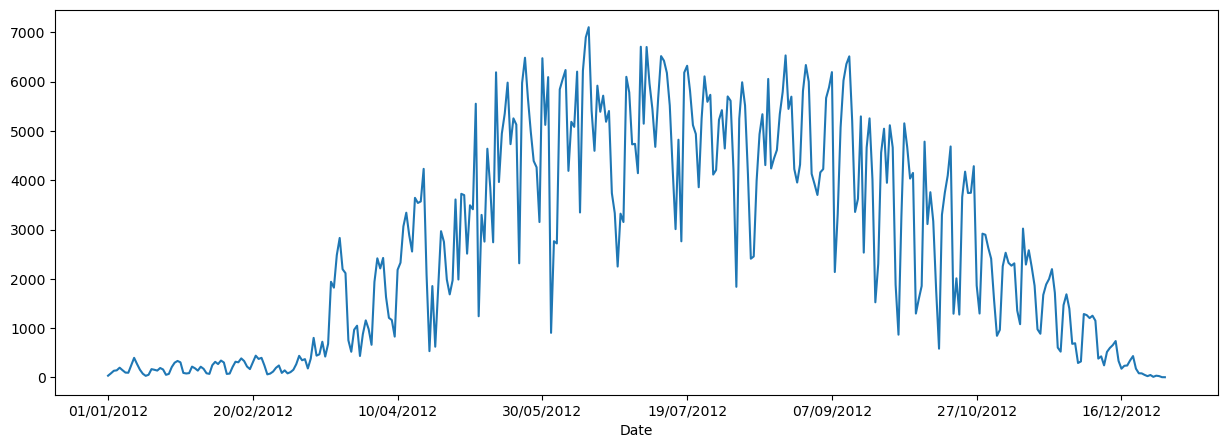

In [210]:
# plot the bikers travelling to Berri1 over the year
df1["Berri1"].plot(figsize = (15,5))

<Axes: xlabel='Date'>

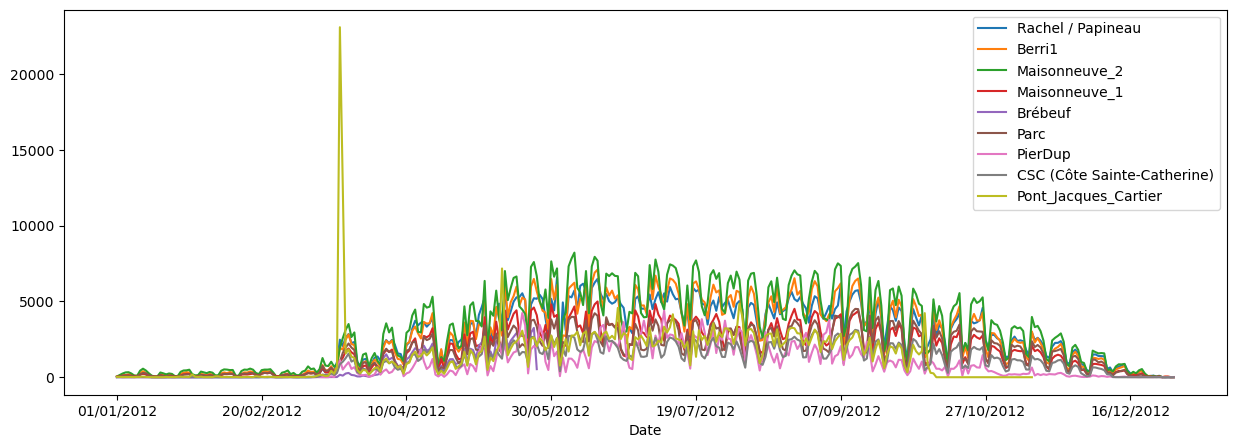

In [224]:
# plot all the columns of bikes_df
df1.plot(figsize=(15,5))

## Value counts

Get count of unique values in a particular column/Series.

In [246]:
# what are the unique genre in imdb_df?
df.genre.nunique()

16

<Axes: xlabel='genre'>

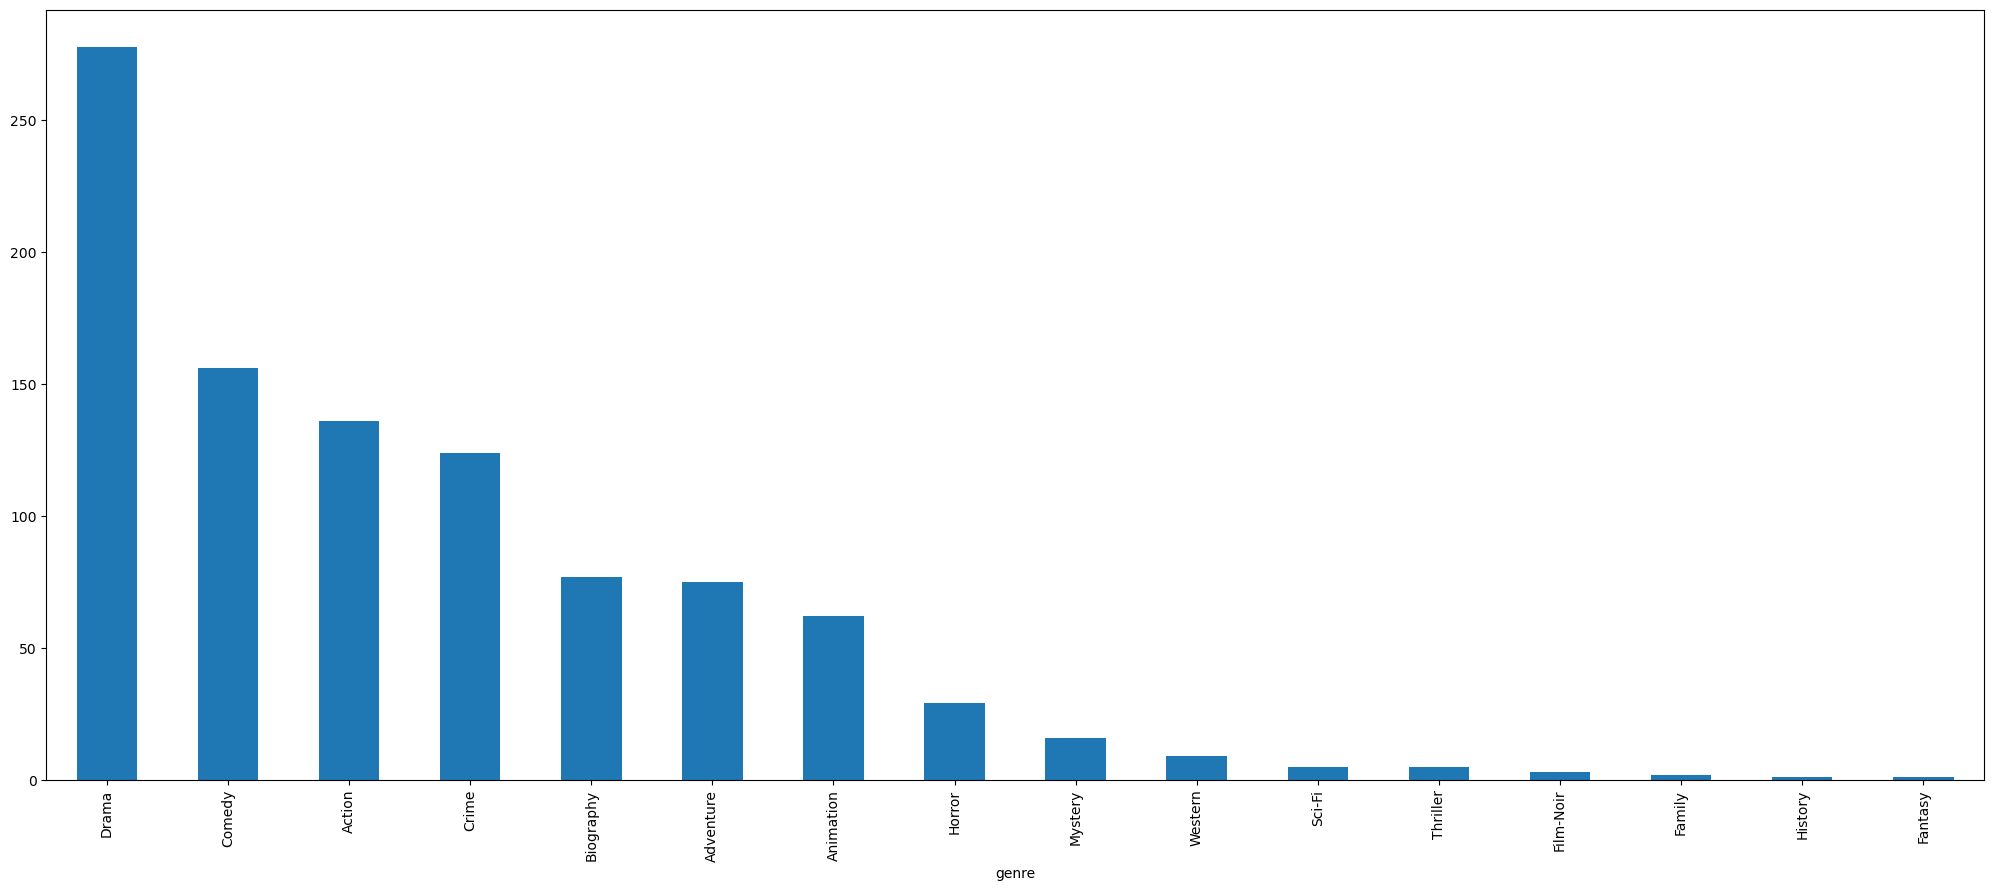

In [254]:
# plotting value counts of unique genres as a bar chart
df['genre'].value_counts().plot(kind='bar',figsize=(25,10))

<Axes: ylabel='count'>

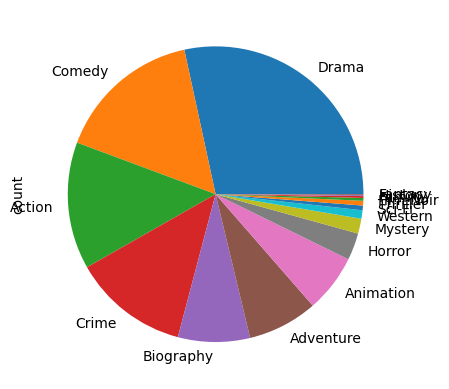

In [272]:
# plotting value counts of unique genres as a pie chart
df['genre'].value_counts().plot(kind='pie')

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [292]:
# show index of bikes_df
df1.index

Index(['01/01/2012', '02/01/2012', '03/01/2012', '04/01/2012', '05/01/2012',
       '06/01/2012', '07/01/2012', '08/01/2012', '09/01/2012', '10/01/2012',
       ...
       '22/12/2012', '23/12/2012', '24/12/2012', '25/12/2012', '26/12/2012',
       '27/12/2012', '28/12/2012', '29/12/2012', '30/12/2012', '31/12/2012'],
      dtype='object', name='Date', length=366)

In [296]:
# get row for date 2012-01-01
df1.loc["01/01/2012"]

Unnamed: 1                     00:00
Rachel / Papineau                 16
Berri1                            35
Maisonneuve_2                     51
Maisonneuve_1                     38
Brébeuf                          5.0
Parc                              26
PierDup                           10
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier            27.0
Name: 01/01/2012, dtype: object

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [304]:
# show 11th row of imdb_df using iloc
df1.iloc[11]

Unnamed: 1                     00:00
Rachel / Papineau                 63
Berri1                           157
Maisonneuve_2                    261
Maisonneuve_1                    134
Brébeuf                          3.0
Parc                             137
PierDup                            9
CSC (Côte Sainte-Catherine)        1
Pont_Jacques_Cartier            15.0
Name: 12/01/2012, dtype: object

## Selecting rows where column has a particular value

In [310]:
# select only those movies where genre is adventure
df[df['genre']=='Adventure']

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,Interstellar,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
...,...,...,...,...,...,...
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
937,7.4,Labyrinth,PG,Adventure,101,"[u'David Bowie', u'Jennifer Connelly', u'Toby ..."
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
953,7.4,The NeverEnding Story,PG,Adventure,102,"[u'Noah Hathaway', u'Barret Oliver', u'Tami St..."


In [314]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
df[(df['star_rating']>8) & (df['star_rating']<130)]['genre'].value_counts()

genre
Drama        92
Crime        43
Comedy       38
Action       37
Adventure    25
Biography    20
Animation    18
Mystery       9
Western       7
Horror        5
Film-Noir     2
Sci-Fi        1
Name: count, dtype: int64

## Adding a new column to DataFrame

In [336]:
# add a weekday column to bikes_df
df1

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,,
01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0,NaN
02/01/2012,00:00,43,83,153,68,11.0,53,6,1,21.0,NaN
03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0,NaN
04/01/2012,00:00,61,144,318,116,2.0,111,8,1,19.0,NaN
05/01/2012,00:00,95,197,330,124,6.0,97,13,2,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27/12/2012,00:00,8,12,7,4,NaN,1,2,0,NaN,NaN
28/12/2012,00:00,0,35,3,38,NaN,0,0,0,NaN,NaN
29/12/2012,00:00,0,27,8,42,NaN,9,0,0,NaN,NaN


## Deleting an existing column from DataFrame

In [342]:
# remove column 'Unnamed: 1' from bikes_df
df1.drop(columns=['weekday'])

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0
02/01/2012,00:00,43,83,153,68,11.0,53,6,1,21.0
03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0
04/01/2012,00:00,61,144,318,116,2.0,111,8,1,19.0
05/01/2012,00:00,95,197,330,124,6.0,97,13,2,16.0
...,...,...,...,...,...,...,...,...,...,...
27/12/2012,00:00,8,12,7,4,NaN,1,2,0,NaN
28/12/2012,00:00,0,35,3,38,NaN,0,0,0,NaN
29/12/2012,00:00,0,27,8,42,NaN,9,0,0,NaN


## Deleting a row in DataFrame

In [350]:
# remove row no. 1 from bikes_df
df.drop(index=1)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [454]:
# group imdb_df by movie genres
genres = df.groupby(["genre"])
genres

In [456]:
# get crime movies group


In [444]:
# get mean of movie durations for each group
df.groupby('title').agg({'duration': ['mean']}) 

,duration
,mean
title,
(500) Days of Summer,95.0
12 Angry Men,96.0
12 Years a Slave,134.0
127 Hours,94.0
2001: A Space Odyssey,160.0
...,...
Zero Dark Thirty,157.0
Zodiac,157.0


In [ ]:
# change duration of all movies in a particular genre to mean duration of the group

In [ ]:
# drop groups/genres that do not have average movie duration greater than 120.

In [414]:
# group weekday wise bikers count
df1.groupby('weekday').size()

Series([], dtype: int64)

In [422]:
# get weekday wise biker count

In [428]:
# plot weekday wise biker count for 'Berri1'

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)